In [1]:
import posixpath
import pandas as pd
import geopandas as gpd
import shapely
import numpy as np
from shapely.geometry import Polygon
from shapely import plotting
import matplotlib.pyplot as plt
import datetime

In [2]:
data_root = "D:/OneDrive/Documents/Cours/4A/SFE/data/"

kh_fronts = gpd.read_file(posixpath.join(data_root, "KH-5_ARGON_fronts/KH-5_ARGON_fronts.shp")).to_crs(epsg=25833)
kh_fronts.head()

,image,mission,timestamp,RGI60ID,RGI70ID,front_id,front_dir,geometry
0,DS09058A024MC012,KH-5 ARGON 9058A,1963-08-29,RGI60-07.00791,RGI2000-v7.0-G-07-01223,2,NE,"LINESTRING (446989.216 8830958.43, 446941.212 ..."
1,DS09058A024MC012,KH-5 ARGON 9058A,1963-08-29,RGI60-07.00777,RGI2000-v7.0-G-07-01225,3,E,"LINESTRING (447461.671 8832029.666, 447497.042..."
2,DS09058A024MC012,KH-5 ARGON 9058A,1963-08-29,RGI60-07.00775,RGI2000-v7.0-G-07-01229,4,SE,"LINESTRING (446131.469 8835920.477, 446232.529..."
3,DS09058A024MC012,KH-5 ARGON 9058A,1963-08-29,RGI60-07.00709,RGI2000-v7.0-G-07-00011,25,W,"LINESTRING (416080.008 8819152.093, 416146.96 ..."
4,DS09058A024MC012,KH-5 ARGON 9058A,1963-08-29,RGI60-07.00664,RGI2000-v7.0-G-07-00015,26,W,"LINESTRING (415736.404 8813938.659, 415733.877..."


In [3]:
landsat_fronts = gpd.read_file(posixpath.join(data_root, "Landsat_MSS_fronts/Landsat_MSS_fronts.shp")).to_crs(epsg=25833)
landsat_fronts.head()

,image,mission,timestamp,RGI60ID,RGI70ID,front_id,front_dir,geometry
0,LM02_L1GS_245002_19760505_20200907_02_T2,Landsat 2 MSS,1976-05-05,RGI60-07.00791,RGI2000-v7.0-G-07-01223,2,NE,"LINESTRING (446917.357 8830600.499, 446900.231..."
1,LM02_L1GS_245002_19760505_20200907_02_T2,Landsat 2 MSS,1976-05-05,RGI60-07.00777,RGI2000-v7.0-G-07-01225,3,E,"LINESTRING (447150.28 8832426.203, 447136.579 ..."
2,LM02_L1GS_245002_19760505_20200907_02_T2,Landsat 2 MSS,1976-05-05,RGI60-07.00775,RGI2000-v7.0-G-07-01229,4,SE,"LINESTRING (446105.553 8836403.019, 446122.679..."
3,LM02_L1GS_245002_19760505_20200907_02_T2,Landsat 2 MSS,1976-05-05,RGI60-07.00794,RGI2000-v7.0-G-07-01268,5,NE,"LINESTRING (445687.662 8843966.161, 445629.431..."
4,LM02_L1GS_245002_19760505_20200907_02_T2,Landsat 2 MSS,1976-05-05,RGI60-07.00790,RGI2000-v7.0-G-07-01266,6,NE,"LINESTRING (442212.658 8844269.303, 442116.749..."


In [4]:
all_fronts = pd.concat([kh_fronts, landsat_fronts], ignore_index=True)
all_fronts.head()

,image,mission,timestamp,RGI60ID,RGI70ID,front_id,front_dir,geometry
0,DS09058A024MC012,KH-5 ARGON 9058A,1963-08-29,RGI60-07.00791,RGI2000-v7.0-G-07-01223,2,NE,"LINESTRING (446989.216 8830958.43, 446941.212 ..."
1,DS09058A024MC012,KH-5 ARGON 9058A,1963-08-29,RGI60-07.00777,RGI2000-v7.0-G-07-01225,3,E,"LINESTRING (447461.671 8832029.666, 447497.042..."
2,DS09058A024MC012,KH-5 ARGON 9058A,1963-08-29,RGI60-07.00775,RGI2000-v7.0-G-07-01229,4,SE,"LINESTRING (446131.469 8835920.477, 446232.529..."
3,DS09058A024MC012,KH-5 ARGON 9058A,1963-08-29,RGI60-07.00709,RGI2000-v7.0-G-07-00011,25,W,"LINESTRING (416080.008 8819152.093, 416146.96 ..."
4,DS09058A024MC012,KH-5 ARGON 9058A,1963-08-29,RGI60-07.00664,RGI2000-v7.0-G-07-00015,26,W,"LINESTRING (415736.404 8813938.659, 415733.877..."


## Comparison of KH fronts retrieved from a same series

In [5]:
# selecting a specific series of images, and a specific glaciers with a front on each image.
glacier = kh_fronts.loc[kh_fronts.timestamp == "1963-08-29"].loc[kh_fronts.RGI70ID == "RGI2000-v7.0-G-07-01166"]
glacier

,image,mission,timestamp,RGI60ID,RGI70ID,front_id,front_dir,geometry
49,DS09058A024MC012,KH-5 ARGON 9058A,1963-08-29,RGI60-07.00896,RGI2000-v7.0-G-07-01166,114,N,"LINESTRING (634297.177 8760360.346, 634490.454..."
111,DS09058A024MC013,KH-5 ARGON 9058A,1963-08-29,RGI60-07.00896,RGI2000-v7.0-G-07-01166,114,N,"LINESTRING (634151.483 8760173.19, 634279.328 ..."


### Resample with constant distance (not sure it is useful)

In [6]:
# from utils import geometry

# def min_distance(line):
#     coords = np.array(line.coords)
#     lengths = np.array([shapely.LineString([coords[i, :], coords[i+1, :]]).length for i in range(coords.shape[0] - 1)])
#     return lengths.min(), lengths.argmin()

# # d, i = min_distance(line)
# # reshaped_line = geometry.redistribute_vertices(line, d)
# # reshaped_line

# glacier.loc[:, "min_distance"] = glacier.geometry.apply(lambda x: min_distance(x)[0])
# glacier

In [7]:
# d = glacier.min_distance.min()
# glacier.loc[:, "geometry"] = glacier.geometry.apply(lambda x: geometry.redistribute_vertices(x, d))
# glacier

### Evaluate distances

In [8]:
# def distance(front1, front2):
#     '''
#     Calculates the distance between two fronts, by dividing the area of the polygon by the mean length.
#     If the front lengths are too different (50%), return None.
#     '''
#     if (front1.length > 1.5*front2.length) or (front2.length > 1.5*front1.length):
#         return None
#     else:
#         polygon = Polygon(list(front1.coords) + list(front2.coords)[::-1])
#         return polygon.area/((front1.length + front2.length)/2 )
    
# line1 = glacier.geometry.iloc[0]
# line2 = glacier.geometry.iloc[1]

# distance(line1, line2)

## Systematic comparison

In [9]:
# timestamps = kh_fronts.timestamp.unique()
# di = 0
# g = ""
# d = ""
# for i in range(len(timestamps)):
#     kh_fronts_date = kh_fronts.loc[kh_fronts.timestamp == timestamps[i]]

#     glaciers = kh_fronts_date.RGI70ID.unique()
#     for j in range(len(glaciers)):
#         kh_fronts_date_glacier = kh_fronts_date.loc[kh_fronts_date.RGI70ID == glaciers[j]]
        
#         for k in range(len(kh_fronts_date_glacier.geometry) - 1):
#             for l in range(k + 1, len(kh_fronts_date_glacier.geometry)):
#                 front1 = kh_fronts_date_glacier.geometry.iloc[k]
#                 front2 = kh_fronts_date_glacier.geometry.iloc[l]
#                 dist = distance(front1, front2)
#                 if dist is not None:
#                     if dist > di:
#                         di = dist
#                         g = glaciers[j]
#                         d = timestamps[i]
# di, g, d

## First Observations

In [10]:
print(len(all_fronts.RGI70ID.value_counts()), "glaciers observed")
print(len(all_fronts.front_id.value_counts()), "fronts observed")

171 glaciers observed
181 fronts observed


## Definition of a method to measure fronts displacements

Test on a specific front

In [12]:
fronts_i = all_fronts.loc[all_fronts.front_id == 141]
fronts_i

,image,mission,timestamp,RGI60ID,RGI70ID,front_id,front_dir,geometry
59,DS09058A024MC012,KH-5 ARGON 9058A,1963-08-29,RGI60-07.01554,RGI2000-v7.0-G-07-01531,141,NE,"LINESTRING (706193.565 8667750.728, 706858.008..."
124,DS09058A024MC013,KH-5 ARGON 9058A,1963-08-29,RGI60-07.01554,RGI2000-v7.0-G-07-01531,141,NE,"LINESTRING (713675.271 8637225.816, 713845.731..."
715,LM02_L1GS_224004_19760712_20200907_02_T2,Landsat 2 MSS,1976-07-12,RGI60-07.01554,RGI2000-v7.0-G-07-01531,141,NE,"LINESTRING (700538.395 8663991.175, 700557.27 ..."
727,LM02_L1GS_228003_19760716_20200907_02_T2,Landsat 2 MSS,1976-07-16,RGI60-07.01554,RGI2000-v7.0-G-07-01531,141,NE,"LINESTRING (701120.513 8663051.852, 701013.526..."
743,LM02_L1GS_230003_19760718_20200907_02_T2,Landsat 2 MSS,1976-07-18,RGI60-07.01554,RGI2000-v7.0-G-07-01531,141,NE,"LINESTRING (700836.202 8663548.992, 700863.965..."


area : 68609359.55143876 distance : 1032.4789928686012
direction : -1.0


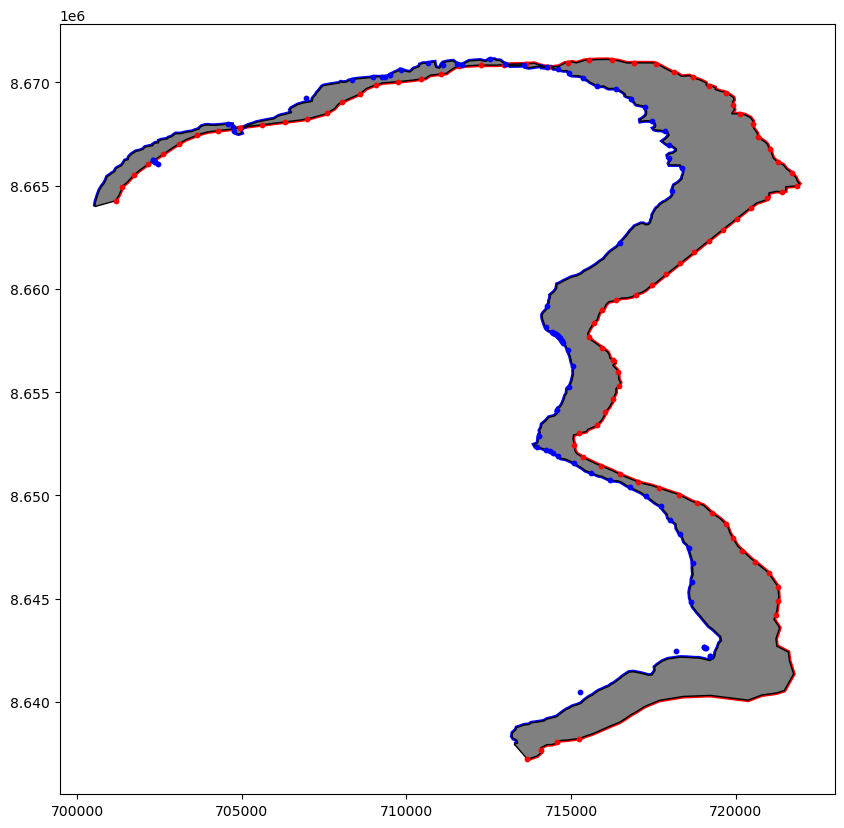

In [21]:
i1, i2 = 1, 2

front1, front2 = fronts_i.iloc[i1].geometry, fronts_i.iloc[i2].geometry
dir1, dir2 = fronts_i.iloc[i1].front_dir, fronts_i.iloc[i2].front_dir
u = np.array([1, 1]) / np.sqrt(2)

## absolute distance
# print("length imbalance :", np.abs(front1.length - front2.length)/np.min([front1.length, front2.length]))
# polygon1 = Polygon(list(front1.coords) + list(front2.coords))
# area1 = polygon1.area
# polygon2 = Polygon(list(front1.coords) + list(front2.coords)[::-1])
# area2 = polygon2.area
# print("area imbalance :", np.abs(area1 - area2)/np.max([area1, area2]))
# d1 = area1/((front1.length + front2.length)/2)
# d2 = area2/((front1.length + front2.length)/2)
# print("distances :", d1, d2)

points_1 = [shapely.Point(coords) for coords in front1.coords]
points_2 = [shapely.Point(coords) for coords in front2.coords]

if shapely.distance(points_1[0], points_2[0]) > shapely.distance(points_1[0], points_2[-1]):
    points_2 = points_2[::-1]
    front2 = shapely.LineString(points_2)
    
polygon = shapely.Polygon(list(front1.coords) + list(front2.coords[::-1]))
area = polygon.area
d = area / ((front1.length + front2.length) / 2)
print("area :", area, "distance :", d)

## direction
# middle of extreme points → not working
# c1 = (np.array(front1.coords)[0] + np.array(front1.coords)[-1])/2
# c2 = (np.array(front2.coords)[0] + np.array(front2.coords)[-1])/2

# centroids → works but a lot of rejections
# c1 = np.array([shapely.centroid(front1).x, shapely.centroid(front1).y])
# c2 = np.array([shapely.centroid(front2).x, shapely.centroid(front2).y])

# center of the font → not working well
# c1 = np.array([front1.interpolate(0.5 * front1.length).x, front1.interpolate(0.5 * front1.length).y])
# c2 = np.array([front2.interpolate(0.5 * front2.length).x, front2.interpolate(0.5 * front2.length).y])

# dot_prod = np.dot(c2-c1, u)#/ np.linalg.norm(c2-c1)
# sgn = np.sign(dot_prod)
# print("dot product :", dot_prod, "sign :", sgn)

# center of the front1 + using flow direction → probably the best solution
points_interp_1 = pd.DataFrame(
    [],
    columns=["points", "x", "y"]
)
points_interp_1.loc[:, "points"] = front1.interpolate(np.linspace(0, front1.length, 100))
points_interp_1.loc[:, ["x", "y"]] = np.stack([np.array([points_interp_1.points.iloc[i].x, points_interp_1.points.iloc[i].y]) for i in range(100)], axis=0)
ll = shapely.MultiLineString([np.stack([points_interp_1.loc[:, ["x", "y"]].iloc[i] - u * 50000, points_interp_1.loc[:, ["x", "y"]].iloc[i] + u * 50000])for i in range(100)])
points_interp_2 = pd.DataFrame(
    [],
    columns=["points", "x", "y"]
)
for i in range(len(points_interp_1)):
    l = ll.geoms[i]
    point_interp_2_i = shapely.intersection(front2, l)
    
    if point_interp_2_i.is_empty:
        points_interp_2.loc[len(points_interp_2), ["points", "x", "y"]] = [None, None, None]
        
    elif isinstance(point_interp_2_i, shapely.Point):
        points_interp_2.loc[len(points_interp_2), ["points", "x", "y"]] = [point_interp_2_i, point_interp_2_i.x, point_interp_2_i.y]
    
    elif isinstance(point_interp_2_i, shapely.MultiPoint):
        point_interp_2_i = np.array([np.array([pt.x, pt.y]) for pt in point_interp_2_i.geoms]).mean(axis=0)
        point_interp_2_i = shapely.Point(point_interp_2_i)
        points_interp_2.loc[len(points_interp_2), ["points", "x", "y"]] = [point_interp_2_i, point_interp_2_i.x, point_interp_2_i.y]

points_interp = pd.concat([points_interp_1, points_interp_2], axis=1)
points_interp.columns = ["points_1", "x1", "y1", "points_2", "x2", "y2"]
points_interp.dropna(inplace=True)

# points_interp
points_interp.loc[:, "x21"] = points_interp.loc[:, "x2"] - points_interp.loc[:, "x1"]
points_interp.loc[:, "y21"] = points_interp.loc[:, "y2"] - points_interp.loc[:, "y1"]
points_interp.loc[:, "dot_prod"] = points_interp.loc[:, ["x21", "y21"]].apply(lambda z: z.x21 * u[0] + z.y21 * u[1], axis=1)
sgn = np.sign(points_interp.dot_prod.mean())

print("direction :", sgn)

## plots
# fig, axs = plt.subplots(ncols=2, figsize=[10, 6])
# shapely.plotting.plot_line(front1, color="red", add_points=False, linewidth=3, ax=axs[0])
# shapely.plotting.plot_line(front2, color="blue", add_points=False, linewidth=3, ax=axs[0])
# shapely.plotting.plot_polygon(polygon1, facecolor="gray", edgecolor="k", add_points=False, ax=axs[0])
# # axs[0].scatter(c1[0], c1[1], color="red")
# # axs[0].scatter(c2[0], c2[1], color="blue")
# # shapely.plotting.plot_points(c1_s, color="red", ax=axs[0])
# # shapely.plotting.plot_points(c2_s, color="blue", ax=axs[0])
# axs[0].scatter(points_interp.x1, points_interp.y1, color="red", s=10, label="front 1")
# axs[0].scatter(points_interp.x2, points_interp.y2, color="blue", s=10, label="front 2")

# shapely.plotting.plot_line(front1, color="red", add_points=False, linewidth=3, ax=axs[1])
# shapely.plotting.plot_line(front2, color="blue", add_points=False, linewidth=3, ax=axs[1])
# shapely.plotting.plot_polygon(polygon2, facecolor="gray", edgecolor="k", add_points=False, ax =axs[1])
# # axs[1].scatter(c1[0], c1[1], color="red")
# # axs[1].scatter(c2[0], c2[1], color="blue")
# # shapely.plotting.plot_points(c1_s, color="red", ax=axs[1])
# # shapely.plotting.plot_points(c2_s, color="blue", ax=axs[1])
# axs[1].scatter(points_interp.x1, points_interp.y1, color="red", s=10, label="front 1")
# axs[1].scatter(points_interp.x2, points_interp.y2, color="blue", s=10, label="front 2")

fig, ax = plt.subplots(figsize=[10, 10])
shapely.plotting.plot_line(front1, color="red", add_points=False, linewidth=3, ax=ax)
shapely.plotting.plot_line(front2, color="blue", add_points=False, linewidth=3, ax=ax)
shapely.plotting.plot_polygon(polygon, facecolor="gray", edgecolor="k", add_points=False, ax=ax)
ax.scatter(points_interp.x1, points_interp.y1, color="red", s=10, label="front 1")
ax.scatter(points_interp.x2, points_interp.y2, color="blue", s=10, label="front 2")

Definition of the functions used to measure the displacements:

In [ ]:
def distance_abs(front1, front2):
    '''
    Calculates the absolute distance between two fronts, by dividing the area of the polygon by the mean length.
    If the front lengths are too different (50%), returns None.
    '''
    if np.abs(front1.length - front2.length)/np.min([front1.length, front2.length]) >= 0.5:
        return None
    else:
        polygon1 = Polygon(list(front1.coords) + list(front2.coords))
        area1 = polygon1.area
        polygon2 = Polygon(list(front1.coords) + list(front2.coords)[::-1])
        area2 = polygon2.area
        return 2 * np.min([area1, area2]) / (front1.length + front2.length)
    
def distance(front1, front2, dir_1, dir_2):
    '''
    Calculates the signed distance between two fronts, using flow direction.
    returns a tuple (distance, error_code):
    - distance: the signed distance between the fronts, or None if the fronts are too different
    - error_code: 0 = everything is ok,, 1 = front lengths are too different, 2 = direction is inaccurate 
    '''
    assert dir_1 == dir_2, "Fronts must have the same direction" # not necessary for the calculation, just sanitary check.
    dist_abs = distance_abs(front1, front2)
    if dist_abs is None:
        return None, 1
    else:
        # transform direction into av vector:
        if dir_1 == "N":
            dir_vector = np.array([0, 1])
        elif dir_1 == "S":
            dir_vector = np.array([0, -1])
        elif dir_1 == "E":
            dir_vector = np.array([1, 0])
        elif dir_1 == "W":
            dir_vector = np.array([-1, 0])
        elif dir_1 == "NE":
            dir_vector = np.array([1, 1]) / np.sqrt(2)
        elif dir_1 == "NW":
            dir_vector = np.array([-1, 1]) / np.sqrt(2)
        elif dir_1 == "SE":
            dir_vector = np.array([1, -1]) / np.sqrt(2)
        elif dir_1 == "SW":
            dir_vector = np.array([-1, -1]) / np.sqrt(2)
        else:
            raise ValueError(f"Unknown direction: {dir_1}")
        
        # old method with centroids
        # c1 = np.array([shapely.centroid(front1).x, shapely.centroid(front1).y])
        # c2 = np.array([shapely.centroid(front2).x, shapely.centroid(front2).y])
        
        # dot_prod = np.dot(c2-c1, dir_vector)/ np.linalg.norm(c2-c1)
        
        # if np.abs(dot_prod) < np.sqrt(2)/2:
        #     return None, 2
        # else:
        #     return np.sign(dot_prod) * dist_abs, 0
        
        c1 = np.array([front1.interpolate(0.5 * front1.length).x, front1.interpolate(0.5 * front1.length).y])
        l = shapely.LineString(np.stack([c1 - dir_vector * 50000, c1, c1 + dir_vector * 50000]))
        c2_s = shapely.intersection(front2, l)
        
        
        if c2_s.is_empty or isinstance(c2_s, shapely.geometry.multipoint.MultiPoint):
            return None, 2
        else:
            c2 = np.array([c2_s.x, c2_s.y])
            dot_prod = np.dot(c2-c1, dir_vector) #/ np.linalg.norm(c2-c1) # normalisation can be removed to give an extra assessment of the distance.
            return np.sign(dot_prod) * dist_abs, 0

In [ ]:
dists = []
skip_count_len = 0
skip_count_dir = 0
total_count = 0
timestamps = [datetime.datetime(1962, 5, 16), datetime.datetime(1963, 8, 29)]
for timestamp in timestamps:
    dists_timestamp = []
    front_ids = kh_fronts.loc[kh_fronts.timestamp == timestamp].front_id.unique()
    for i_front_id, front_id in enumerate(front_ids):
        fronts = kh_fronts.loc[kh_fronts.front_id == front_id].loc[kh_fronts.timestamp == timestamp]
        for k in range(len(fronts.geometry) - 1):
            for l in range(k + 1, len(fronts.geometry)):
                front1 = fronts.geometry.iloc[k]
                front2 = fronts.geometry.iloc[l]
                dir_1 = fronts.front_dir.iloc[k]
                dir_2 = fronts.front_dir.iloc[l]
                # try:
                dist, e = distance(front1, front2, dir_1, dir_2)
                # except:
                #     print(front_id, fronts.index[k], fronts.index[l])
                if dist is not None:
                    dists_timestamp.append(dist)
                elif e == 1:
                    skip_count_len += 1
                elif e == 2:
                    skip_count_dir += 1
                total_count += 1
    dists.append(dists_timestamp)
        
dists_npy = [np.array(dists_timestamp) for dists_timestamp in dists]
sigma_kh = [dists_npy_timestamp.std() for dists_npy_timestamp in dists_npy]
mean = [dists_npy_timestamp.mean() for dists_npy_timestamp in dists_npy]

for i in range(len(timestamps)):
    print(f"Timestamp: {timestamps[i]}, Mean distance: {mean[i]:.2f} m, Standard deviation: {sigma_kh[i]:.2f} m")

print(f"Skipped {skip_count_len + skip_count_dir} ({skip_count_dir} direction and {skip_count_len} length) comparisons out of {total_count}.")
fig, axs = plt.subplots(ncols=len(timestamps), figsize=(11, 5))
axs[0].hist(dists[0], bins=np.linspace(-2500, 2500, 20), color="red")
axs[0].set_title(timestamps[0].strftime("%Y"))
axs[1].hist(dists[1], bins=np.linspace(-2500, 2500, 20), color="darkred")
axs[1].set_title(timestamps[1].strftime("%Y"))
fig.suptitle("Distribution of distances between KH-5 ARGON fronts")
fig.savefig("images/KH-5_ARGON_fonts_accuracy.png", bbox_inches="tight")

### Landsat

In [ ]:
def get_year(timestamp):
    return timestamp.year

dists = []
skip_count_len = 0
skip_count_dir = 0
total_count = 0
years = [1976, 1978]
for year in years:
    dists_year = []
    front_ids = landsat_fronts.loc[landsat_fronts.timestamp.apply(get_year) == year].front_id.unique()
    for front_id in front_ids:
        fronts = landsat_fronts.loc[landsat_fronts.front_id == front_id].loc[landsat_fronts.timestamp.apply(get_year) == year]
        for k in range(len(fronts.geometry) - 1):
            for l in range(k + 1, len(fronts.geometry)):
                front1 = fronts.geometry.iloc[k]
                front2 = fronts.geometry.iloc[l]
                dir_1 = fronts.front_dir.iloc[k]
                dir_2 = fronts.front_dir.iloc[l]
                # print(front_id, fronts.index[k], fronts.index[l])
                # try:
                dist, e = distance(front1, front2, dir_1, dir_2)
                # except AttributeError as err:
                #     print(front_id, fronts.index[k], fronts.index[l], dir_1)
                if dist is not None:
                    dists_year.append(dist)
                elif e == 1:
                    skip_count_len += 1
                elif e == 2:
                    skip_count_dir += 1
                total_count += 1
    dists.append(dists_year)
        
dists_npy = [np.array(dists_year) for dists_year in dists]
sigma_landsat = [dists_npy_year.std() for dists_npy_year in dists_npy]
mean = [dists_npy_year.mean() for dists_npy_year in dists_npy]

for i in range(len(years)):
    print(f"Year: {years[i]}, Mean distance: {mean[i]:.2f} m, Standard deviation: {sigma_landsat[i]:.2f} m")

print(f"Skipped {skip_count_len + skip_count_dir} ({skip_count_dir} direction and {skip_count_len} length) comparisons out of {total_count}.")
fig, axs = plt.subplots(ncols=len(years), figsize=(11, 5))
axs[0].hist(dists[0], bins=np.linspace(-800, 800, 20), color="blue")
axs[0].set_title(years[0])
axs[1].hist(dists[1], bins=np.linspace(-800, 800, 20), color="darkblue")
axs[1].set_title(years[1])
fig.suptitle("Distribution of distances between Landsat MSS fronts")
fig.savefig("images/Landsat_MSS_fonts_accuracy.png", bbox_inches="tight")

In [ ]:
years = np.array([1962, 1963, 1976, 1978])
sigmas_prime = np.floor(np.concatenate([sigma_kh, sigma_landsat]))
sigmas = np.floor(sigmas_prime / np.sqrt(2))
print(sigmas_prime, sigmas)

In [ ]:
uncertainties = pd.DataFrame(
    [],
    columns=["year_1", "year_2", "sigma_dist", "2_sigma_dist", "3_sigma_dist"]
)

for i in range(len(years) - 1):
    for j in range(i, len(years)):
        uncertainties.loc[len(uncertainties)] = [
            years[i],
            years[j],
            np.sqrt(sigmas[i]**2 + sigmas[j]**2),
            2 * np.sqrt(sigmas[i]**2 + sigmas[j]**2),
            3 * np.sqrt(sigmas[i]**2 + sigmas[j]**2)
        ]
        
uncertainties.loc[:, "years"] = uncertainties.loc[:, ["year_1", "year_2"]].apply(lambda x: (x.iloc[0], x.iloc[1]), axis=1)
uncertainties = uncertainties[["year_1", "year_2", "years", "sigma_dist", "2_sigma_dist", "3_sigma_dist"]]
uncertainties

## Retreat / Advance between KH / Landsat

In [ ]:
results = pd.DataFrame(
    [],
    columns = ["front_id", "year_1", "year_2", "distance"]
)
total_count_len = 0
skip_count_dir = 0
total_count = 0
years = [1962, 1963, 1976, 1978]

for front in all_fronts.front_id.unique():
    # compare observations from any year to fronts from any other year, for a specific front.
    for i_year in range(len(years) - 1):
        year = years[i_year]
        fronts = all_fronts.loc[all_fronts.front_id == front].loc[all_fronts.timestamp.apply(get_year) == year]
        for i_other_year in range(i_year + 1, len(years)):
            other_year = years[i_other_year]
            other_fronts = all_fronts.loc[all_fronts.front_id == front].loc[all_fronts.timestamp.apply(get_year) == other_year]
            
            dists = []
            # compare all the observations between them
            for k in range(len(fronts.geometry)):
                for l in range(len(other_fronts.geometry)):
                    front1 = fronts.geometry.iloc[k]
                    front2 = other_fronts.geometry.iloc[l]
                    dir_1 = fronts.front_dir.iloc[k]
                    dir_2 = other_fronts.front_dir.iloc[l]
                    # print(front) # to identify the fronts that have different flow directions.
                    dist, e = distance(front1, front2, dir_1, dir_2)
                    if dist is not None: # recall: distance returns None if the lengths of the fronts are too different
                        dists.append(dist)
                    elif e == 1:
                        skip_count_len += 1
                    elif e == 2:
                        skip_count_dir += 1
                    total_count += 1
            
            if not dists == []:
                # horrible hack to load an array as a value in a DataFrame
                results_i = pd.DataFrame(
                    [[front, year, other_year, np.array(dists)]],
                    columns=["front_id", "year_1", "year_2", "distance"]
                )      
            else: # load None instead of a list of distances
                results_i = pd.DataFrame(
                    [[front, year, other_year, None]],
                    columns=["front_id", "year_1", "year_2", "distance"]
                )
            results = pd.concat([results, results_i])
            
print(f"Skipped {skip_count_len + skip_count_dir} ({skip_count_dir} direction and {skip_count_len} length) comparisons out of {total_count}.")
results.reset_index(drop=True, inplace=True)
results = results.dropna().reset_index(drop=True)
results

Trying to identify a distribution pattern to compare observations from different years:

In [ ]:
fig, axs = plt.subplots(ncols=5, nrows=5, figsize=[20, 20])
c = 0
for i in range(len(results)):
    if len(results.distance[i]) > 1:
        if c < 25:
            axs[c//5, c%5].hist(results.distance[i], bins=np.linspace(-np.abs(results.distance[i].max()), np.abs(results.distance[i].max()), 5), color="gray")
        c += 1

**Conclusion :** No pattern identified → each distances distribution is approximated by its mean value and associated to the corresponding uncertainty.

In [ ]:
results.loc[:, "mean_distance"] = results.distance.apply(lambda x: np.array(x).mean())
results.loc[:, "uncertainty"] = results.loc[:, ["year_1", "year_2"]].apply(lambda x: uncertainties.loc[(uncertainties.year_1 == x.iloc[0]) & (uncertainties.year_2 == x.iloc[1]), "2_sigma_dist"].values[0], axis=1)

# not necessary but easier to control results : put the years in a single column. 
results.loc[:, "years"] = results.loc[:, ["year_1", "year_2"]].apply(lambda x: (x.iloc[0], x.iloc[1]), axis=1)
results = results[["front_id", "year_1", "year_2", "years", "distance", "mean_distance", "uncertainty"]]

results

In [ ]:
# horrible way to plot a summary of the results, but I could not find better.
results_overview = pd.DataFrame(
    [],
    columns=["years", "uncertainty", "count"]
)
results_overview.loc[:, "years"] = results.years.unique()
results_overview.loc[:, "uncertainty"] = results.uncertainty.unique()
results_overview.loc[:, "count"] = results.years.value_counts().values
results_overview

In [ ]:
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(10, 10))

color_sigma = "orange"
color_2_sigma = "limegreen"
color_3_sigma = "darkgreen"
nbins = 30

years = (1962, 1963)
d = results.loc[results.years == years].mean_distance
N, bins, patches = axs[0, 0].hist(d, color="gray", bins=np.linspace(-np.abs(d).max(), np.abs(d).max(), nbins))
sigma = uncertainties.loc[uncertainties.years == years]["sigma_dist"].values[0]
bins = np.array(bins) + (bins[1] - bins[0])/2  # shift bins to the center
for i in range(len(patches)):
    if np.abs(bins[i]) >= sigma:
        patches[i].set_facecolor(color_sigma)
    if np.abs(bins[i]) >= 2 * sigma:
        patches[i].set_facecolor(color_2_sigma)
    if np.abs(bins[i]) >= 3 * sigma:
        patches[i].set_facecolor(color_3_sigma)
axs[0, 0].set_title(f"{years[0]}-{years[1]}")
print(d.shape[0], d.mean(), d.std())
        
years = (1962, 1976)
d = results.loc[results.years == years].mean_distance
N, bins, patches = axs[0, 1].hist(d, color="gray", bins=np.linspace(-np.abs(d).max(), np.abs(d).max(), nbins))
sigma = uncertainties.loc[uncertainties.years == years]["sigma_dist"].values[0]
bins = np.array(bins) + (bins[1] - bins[0])/2
for i in range(len(patches)):
    if np.abs(bins[i]) >= sigma:
        patches[i].set_facecolor(color_sigma)
    if np.abs(bins[i]) >= 2 * sigma:
        patches[i].set_facecolor(color_2_sigma)
    if np.abs(bins[i]) >= 3 * sigma:
        patches[i].set_facecolor(color_3_sigma)
axs[0, 1].set_title(f"{years[0]}-{years[1]}")
print(d.shape[0], d.mean(), d.std())
        
years = (1962, 1978)
d = results.loc[results.years == years].mean_distance
N, bins, patches = axs[1, 0].hist(d, color="gray", bins=np.linspace(-np.abs(d).max(), np.abs(d).max(), nbins))
sigma = uncertainties.loc[uncertainties.years == years]["sigma_dist"].values[0]
bins = np.array(bins) + (bins[1] - bins[0])/2
for i in range(len(patches)):
    if np.abs(bins[i]) >= sigma:
        patches[i].set_facecolor(color_sigma)
    if np.abs(bins[i]) >= 2 * sigma:
        patches[i].set_facecolor(color_2_sigma)
    if np.abs(bins[i]) >= 3 * sigma:
        patches[i].set_facecolor(color_3_sigma)
axs[1, 0].set_title(f"{years[0]}-{years[1]}")
print(d.shape[0], d.mean(), d.std())
        
years = (1963, 1976)
d = results.loc[results.years == years].mean_distance
N, bins, patches = axs[1, 1].hist(d, color="gray", bins=np.linspace(-np.abs(d).max(), np.abs(d).max(), nbins))
sigma = uncertainties.loc[uncertainties.years == years]["sigma_dist"].values[0]
bins = np.array(bins) + (bins[1] - bins[0])/2
for i in range(len(patches)):
    if np.abs(bins[i]) >= sigma:
        patches[i].set_facecolor(color_sigma)
    if np.abs(bins[i]) >= 2 * sigma:
        patches[i].set_facecolor(color_2_sigma)
    if np.abs(bins[i]) >= 3 * sigma:
        patches[i].set_facecolor(color_3_sigma)
axs[1, 1].set_title(f"{years[0]}-{years[1]}")
print(d.shape[0], d.mean(), d.std())
        
years = (1963, 1978)
d = results.loc[results.years == years].mean_distance
N, bins, patches = axs[2, 0].hist(d, color="gray", bins=np.linspace(-np.abs(d).max(), np.abs(d).max(), nbins))
sigma = uncertainties.loc[uncertainties.years == years]["sigma_dist"].values[0]
bins = np.array(bins) + (bins[1] - bins[0])/2
for i in range(len(patches)):
    if np.abs(bins[i]) >= sigma:
        patches[i].set_facecolor(color_sigma)
    if np.abs(bins[i]) >= 2 * sigma:
        patches[i].set_facecolor(color_2_sigma)
    if np.abs(bins[i]) >= 3 * sigma:
        patches[i].set_facecolor(color_3_sigma)
axs[2, 0].set_title(f"{years[0]}-{years[1]}")
print(d.shape[0], d.mean(), d.std())
        
years = (1976, 1978)
d = results.loc[results.years == years].mean_distance
N, bins, patches = axs[2, 1].hist(d, color="gray", bins=np.linspace(-np.abs(d).max(), np.abs(d).max(), nbins))
sigma = uncertainties.loc[uncertainties.years == years]["sigma_dist"].values[0]
bins = np.array(bins) + (bins[1] - bins[0])/2
for i in range(len(patches)):
    if np.abs(bins[i]) >= sigma:
        patches[i].set_facecolor(color_sigma)
    if np.abs(bins[i]) >= 2 * sigma:
        patches[i].set_facecolor(color_2_sigma)
    if np.abs(bins[i]) >= 3 * sigma:
        patches[i].set_facecolor(color_3_sigma)
axs[2, 1].set_title(f"{years[0]}-{years[1]}")
print(d.shape[0], d.mean(), d.std())
fig.savefig("images/results_distances_distributions.png", bbox_inches="tight")

In [ ]:
# list of surges and retreats

surges = pd.DataFrame(
    [],
    columns=["front_id", "years", "mean_distance", "uncertainty"]
)

retreats = pd.DataFrame(
    [],
    columns=["front_id", "years", "mean_distance", "uncertainty"]
)

for years in [(1962, 1963), (1962, 1976), (1962, 1978), (1963, 1976), (1963, 1978), (1976, 1978)]:
    # print("years :", years)
    sigma = uncertainties.loc[uncertainties.years == years]["sigma_dist"].values[0]
    res = results.where(results.loc[results.years == years, "mean_distance"].apply(lambda x: np.abs(x) >= 2 * sigma)).dropna().loc[:, ["front_id", "years", "mean_distance", "uncertainty"]]
    # print(res)
    surges_1 = res.where(res.mean_distance.apply(lambda x: x >= 0)).dropna()
    retreats_1 = res.where(res.mean_distance.apply(lambda x: x < 0)).dropna()
    if not surges_1.empty:
        surges = pd.concat([surges, surges_1])
    if not retreats_1.empty:
        retreats = pd.concat([retreats, retreats_1])
        
surges

In [ ]:
retreats

In [ ]:
len(surges.front_id.unique()), surges.front_id.unique(), len(retreats.front_id.unique()), retreats.front_id.unique()

Selection of observations that show a displacement between the 1960's and 1970's: (not super relevant)

In [ ]:
# important_results = results.loc[(results.year_1 == 1962) | (results.year_1 == 1963)].loc[(results.year_2 == 1976) | (results.year_2 == 1978)]
# important_results

In [ ]:
# important_results_overview = pd.DataFrame(
#     [],
#     columns=["years", "uncertainty", "count"]
# )
# important_results_overview.loc[:, "years"] = important_results.years.unique()
# important_results_overview.loc[:, "uncertainty"] = important_results.uncertainty.unique()
# important_results_overview.loc[:, "count"] = important_results.years.value_counts().values
# important_results_overview